In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
# Load datasets
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_data.shape

(1115, 10)

In [ ]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
store_data.duplicated().sum()

0

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
train_data.shape

(1017209, 9)

In [ ]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:

test_data.shape

(41088, 8)

In [ ]:

test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:

test_data.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
test_data.duplicated().sum()

0

In [ ]:
# Convert date columns to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

Merging Data Set sample and Test and storing them in a new Data Frame DF2

In [ ]:
# Merge data
df1=pd.merge(store_data,train_data,on='Store',how='inner')
df1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
df1.shape

(1017209, 18)

In [ ]:
df2=test_data.merge(store_data,on='Store',how='inner')
df2.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [ ]:
df1.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,323348
CompetitionOpenSinceYear,323348
Promo2,0
Promo2SinceWeek,508031
Promo2SinceYear,508031
PromoInterval,508031


In [ ]:
# Fill null values in 'CompetitionDistance' with the median
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df1[col].fillna('unknown', inplace=True)

In [ ]:
# Fill null values in other columns with the most frequent value (mode)
for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  object        
 5   CompetitionOpenSinceYear   1017209 non-null  object        
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  object        
 8   Promo2SinceYear            1017209 non-null  object        
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

Convert the object data type of features to string and then apply label encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  int64         
 2   Assortment                 1017209 non-null  int64         
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  int64         
 5   CompetitionOpenSinceYear   1017209 non-null  int64         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int64         
 8   Promo2SinceYear            1017209 non-null  int64         
 9   PromoInterval              1017209 non-null  int64         
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

correlation and HeatMap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

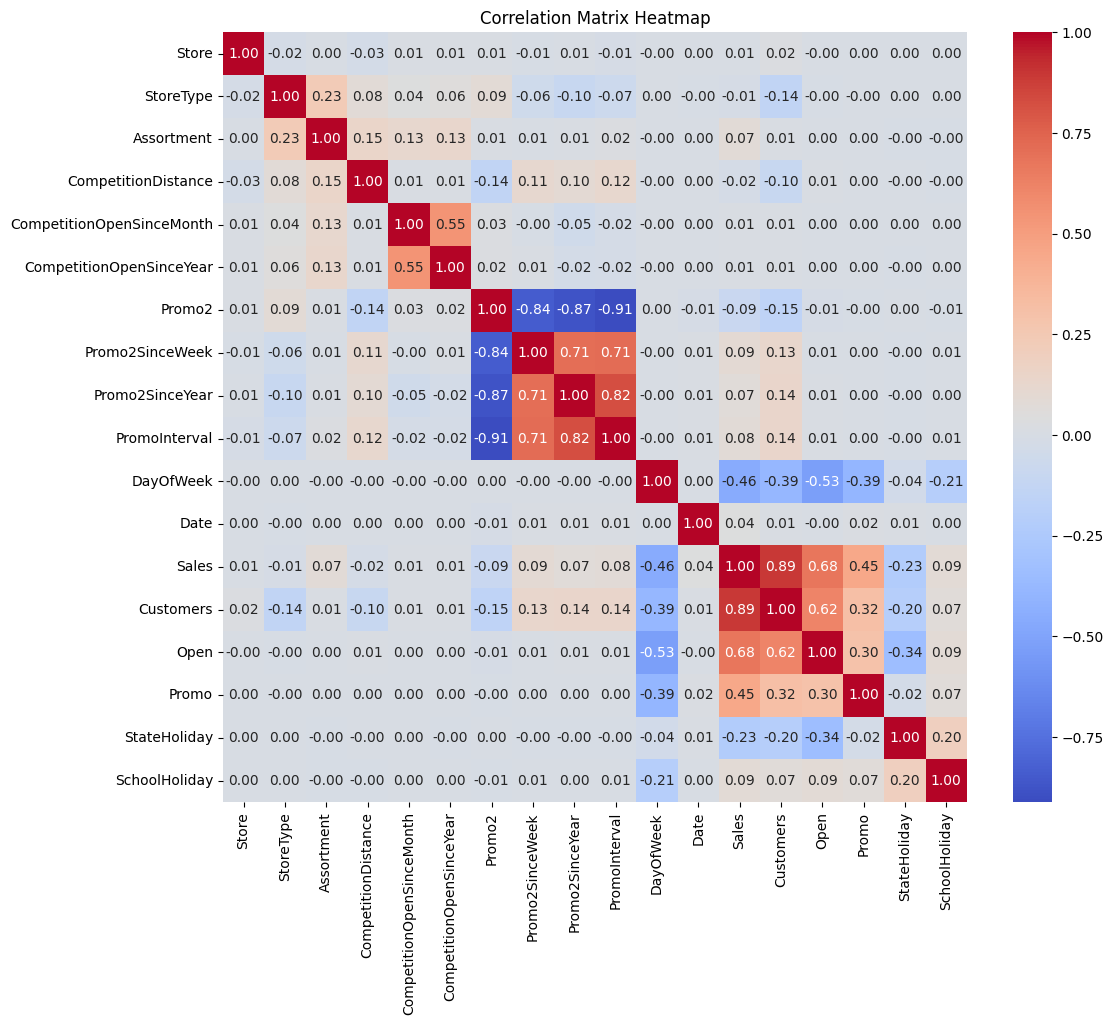

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Finding the features that have more than 0.5 correlation coefficient with sales

In [ ]:
# Get the correlation of all features with 'Sales'
sales_correlation = correlation_matrix['Sales'].drop('Sales')

# Print features with correlation greater than 0.5
print("Features with correlation coefficient > 0.5 with Sales:")
for feature, correlation in sales_correlation.items():
  if abs(correlation) > 0.5:
    print(f"{feature}: {correlation}")

Features with correlation coefficient > 0.5 with Sales:
Customers: 0.8947107733017349
Open: 0.678472346014201


Finding the features that have positively correlation coefficient with sales with Descending Order

In [ ]:
# Finding the features that positive correlation coefficient with sales with Descending Order
positive_sales_correlation = sales_correlation[sales_correlation > 0]
positive_sales_correlation_sorted = positive_sales_correlation.sort_values(ascending=False)

print("\nFeatures with positive correlation coefficient with Sales (descending order):")
positive_sales_correlation_sorted


Features with positive correlation coefficient with Sales (descending order):


,Sales
Customers,0.894711
Open,0.678472
Promo,0.452345
Promo2SinceWeek,0.089716
SchoolHoliday,0.085124
PromoInterval,0.079829
Assortment,0.074941
Promo2SinceYear,0.073038
Date,0.041904
CompetitionOpenSinceYear,0.014257


Select K best Method and print the features that are having more than 0.5 correlation coefficient with sales

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'df1' is your DataFrame and 'Sales' is your target variable
X = df1.drop(['Sales', 'Date'], axis=1)  # Exclude the 'Date' column
y = df1['Sales']

# Check for NaN values in X and replace them with the median of each column
for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all') #k='all' to consider all features. You can specify 'k' for top k features.
X_new = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature importance
feature_scores

,Feature,Score
11,Customers,4.081763e+06
12,Open,8.676431e+05
10,DayOfWeek,2.762247e+05
13,Promo,2.616805e+05
14,StateHoliday,5.631061e+04
6,Promo2,8.501293e+03
7,Promo2SinceWeek,8.253983e+03
15,SchoolHoliday,7.424585e+03
9,PromoInterval,6.523912e+03
2,Assortment,5.745017e+03


In [ ]:
df1['StoreType'].value_counts()

,count
StoreType,
0,551627
3,312912
2,136840
1,15830


Sales and Storetype Bar Plot

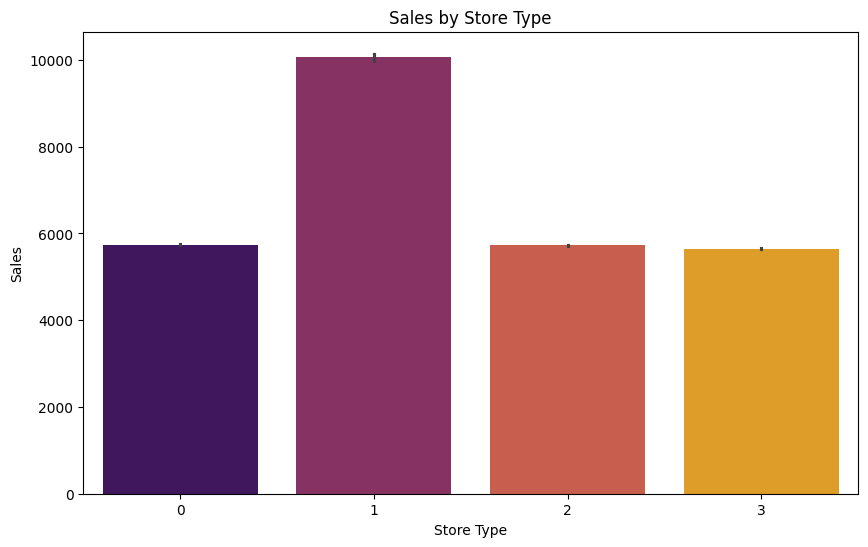

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=df1, palette='inferno')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


Time series and sales Plot

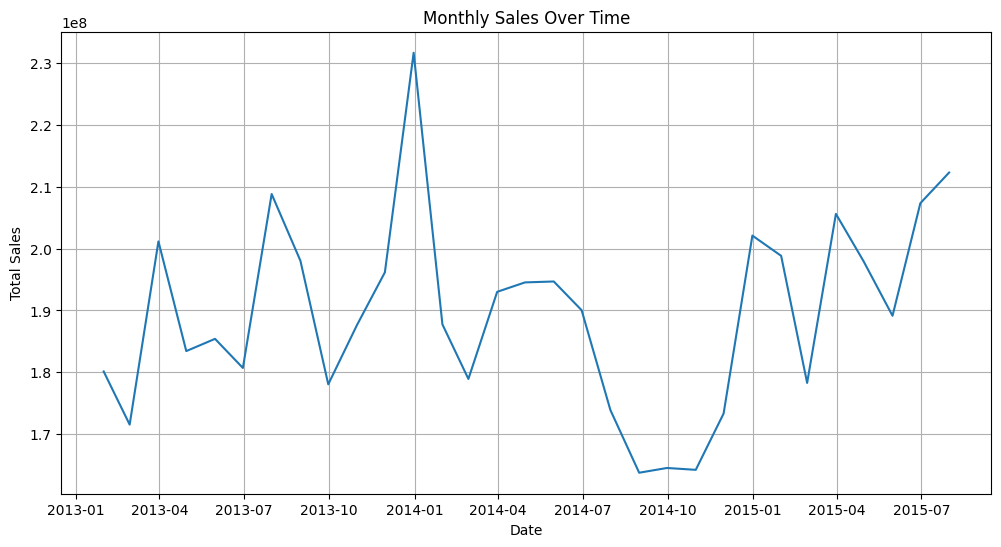

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.merge(store_data,train_data,on='Store',how='inner')

# Convert 'Date' column to datetime objects if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Set 'Date' as the index
df1 = df1.set_index('Date')

# Resample to a desired frequency (e.g., monthly) and sum the sales
df1_monthly = df1['Sales'].resample('M').sum()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df1_monthly)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Assortment and Sales Bar Plot

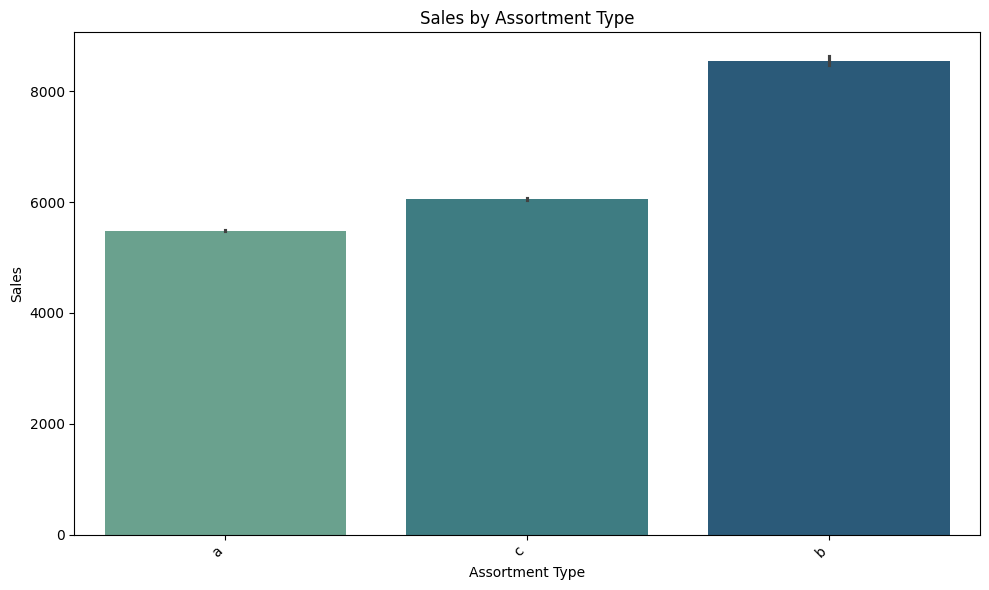

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Assortment and Sales Bar Plot with Different Colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=df1, palette='crest')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Compare the distribution of promotions across data frame

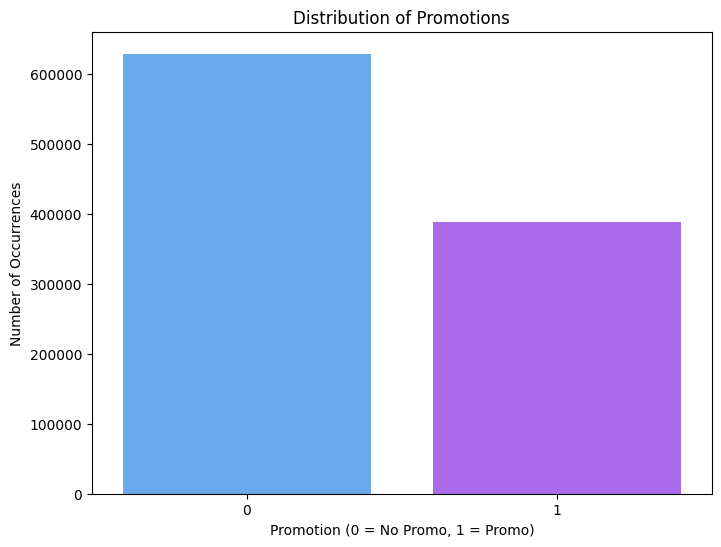

In [ ]:
# Check for the presence of the 'Promo' column before proceeding
if 'Promo' in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Promo', data=df1, palette='cool')
    plt.title('Distribution of Promotions')
    plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
    plt.ylabel('Number of Occurrences')
    plt.show()
else:
    print("'Promo' column not found in the DataFrame. Please check the column name.")


In [ ]:
df1['Promo'].skew()

0.4878378482245114

In [ ]:
import pandas as pd

# Group by 'Store' and sum 'Sales'
store_sales = df1.groupby('Store')['Sales'].sum()

# Get the top 10 stores with the highest sales
top_10_stores = store_sales.nlargest(10)

print("Top 10 Stores with Highest Sales:")
top_10_stores

Top 10 Stores with Highest Sales:


,Sales
Store,
262,19516842
817,17057867
562,16927322
1114,16202585
251,14896870
513,14252406
788,14082141
733,14067158
383,13489879


Treating the Ouliers Present in the DataFrame

In [ ]:
import pandas as pd
import numpy as np

def treat_outliers_capping(df1):
    """
    Finds outliers in numerical features of a DataFrame and treats them by capping.

    Args:
        df1: The input DataFrame.

    Returns:
        DataFrame with treated outliers.
    """

    numerical_features = df1.select_dtypes(include=np.number).columns
    for feature in numerical_features:
        Q1 = df1[feature].quantile(0.25)
        Q3 = df1[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df1[feature] = np.clip(df1[feature], lower_bound, upper_bound)

    return df1

# Example usage (assuming df1 is your DataFrame):
df1 = treat_outliers_capping(df1)


Box plot with hue as PromoInterval and finding the average sales with and without promotion after treating the outliers

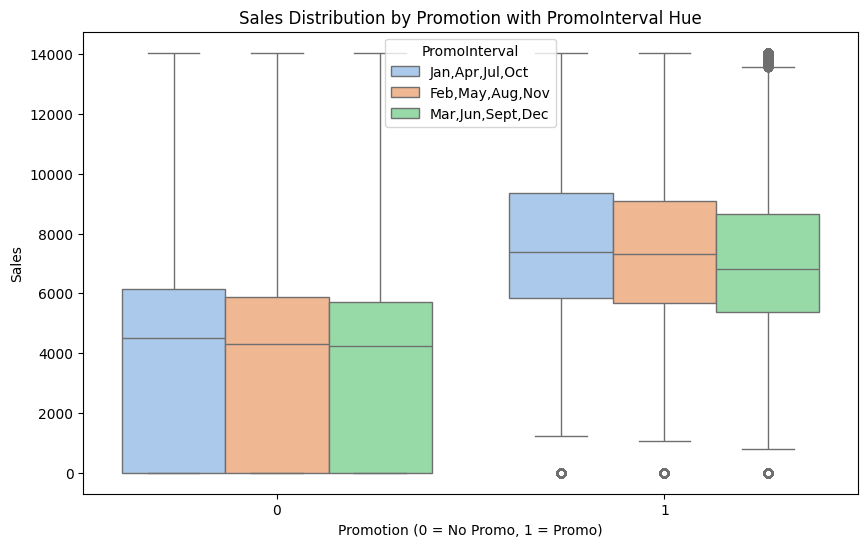

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df1, hue='PromoInterval', palette='pastel')
plt.title('Sales Distribution by Promotion with PromoInterval Hue')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df1[df1['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df1[df1['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

Box plot of Promo with sales , then find the average sales with and without promotion after

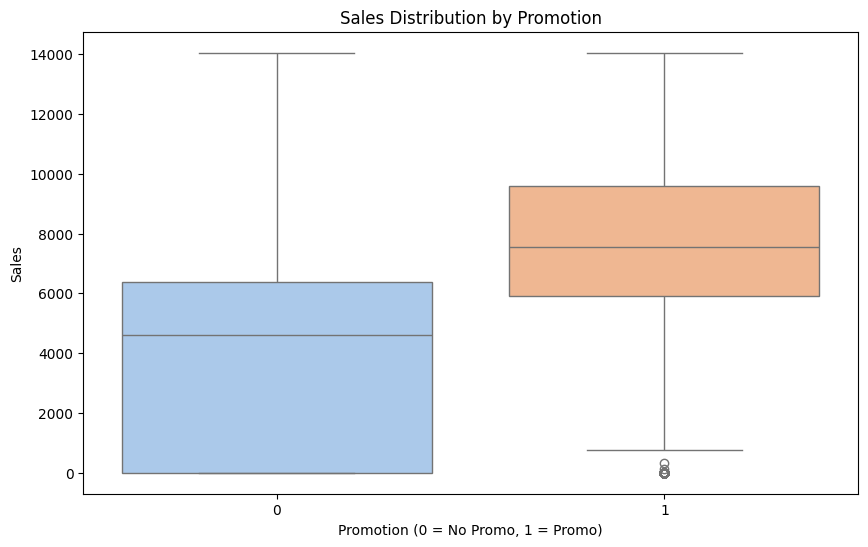

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df1, palette='pastel')
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df1[df1['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df1[df1['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

Correlation between Competition Distance and Sales and plot bar with different bar colors

Correlation between Competition Distance and Sales: -0.01702678733611174
CompetitionDistance_binned
(3.86, 1634.0]        5843.554919
(1634.0, 3248.0]      5577.744703
(3248.0, 4862.0]      5565.823672
(4862.0, 6476.0]      5435.452355
(6476.0, 8090.0]      5691.272258
(8090.0, 9704.0]      5634.399849
(9704.0, 11318.0]     5536.499342
(11318.0, 12932.0]    5728.112574
(12932.0, 14546.0]    5417.859126
(14546.0, 16160.0]    5679.213774
Name: Sales, dtype: float64


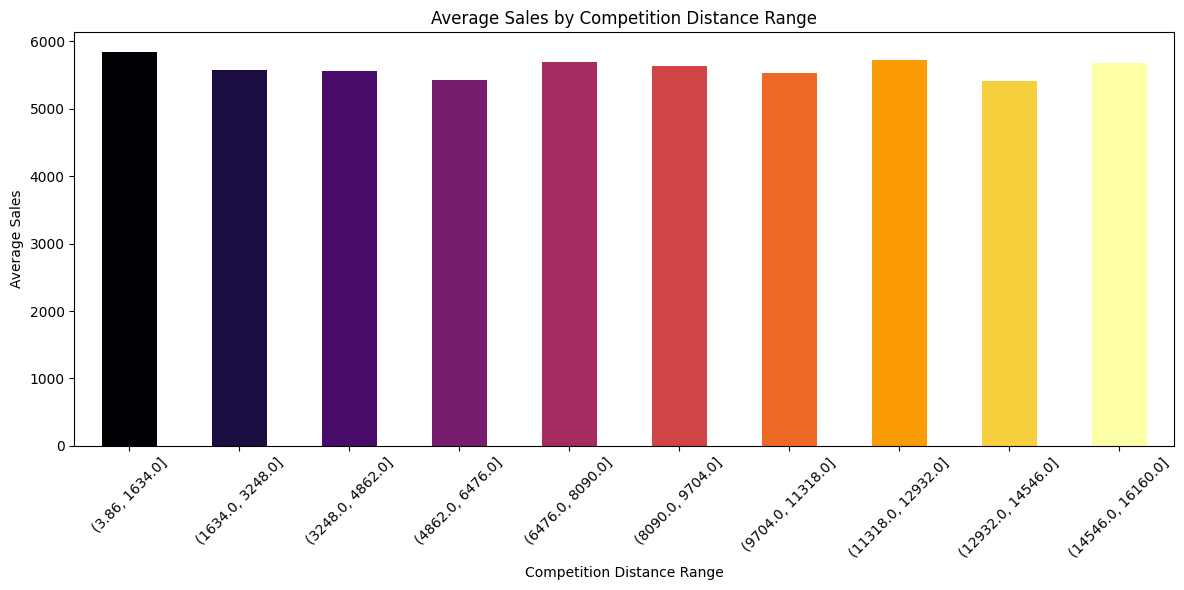

In [ ]:
# Calculate the correlation coefficient
correlation = df1['CompetitionDistance'].corr(df1['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")

#Binning data
df1['CompetitionDistance_binned'] = pd.cut(df1['CompetitionDistance'], bins=10)  # Adjust number of bins

# Calculate mean sales per bin
sales_by_distance_bin = df1.groupby('CompetitionDistance_binned')['Sales'].mean()
print(sales_by_distance_bin)

# Plot the average sales for different competition distance ranges
plt.figure(figsize=(12, 6))
sales_by_distance_bin.plot(kind='bar',color=plt.cm.inferno(np.linspace(0, 1, len(sales_by_distance_bin))))
plt.xlabel('Competition Distance Range')
plt.ylabel('Average Sales')
plt.title('Average Sales by Competition Distance Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Featured Engineering Field- Average Sales of Week

DayOfWeek
0    7599.173160
1    6907.151619
2    6490.340463
3    6185.296246
4    6651.862697
5    5794.275461
6     183.358129
Name: Sales, dtype: float64


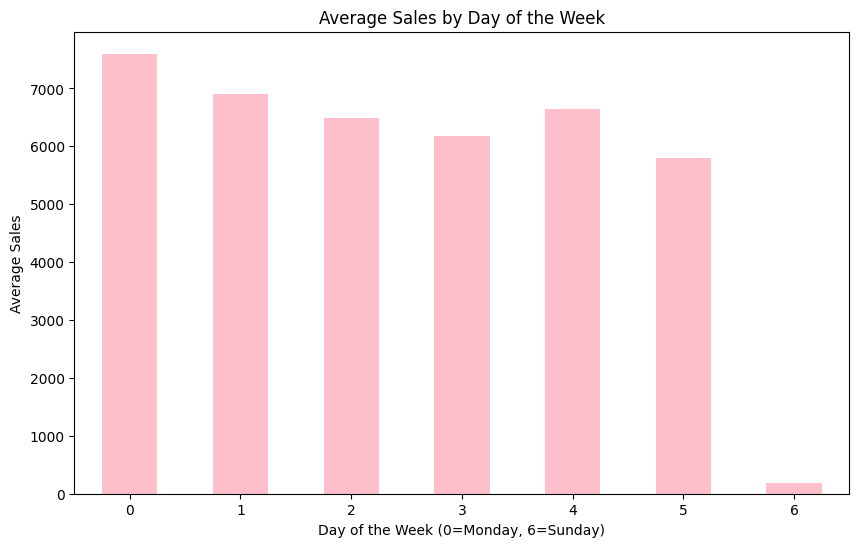

In [ ]:
# Calculate average sales for each day of the week
# Access 'Date' from the index and extract dayofweek
df1['DayOfWeek'] = df1.index.dayofweek
average_sales_by_day = df1.groupby('DayOfWeek')['Sales'].mean()

# Print the result
print(average_sales_by_day)

# Optional: Create a bar plot to visualize the average sales for each day of the week
plt.figure(figsize=(10, 6))
average_sales_by_day.plot(kind='bar', color='pink')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df1.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2013-01-05,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4771.0,339,1,0,0,0,"(4862.0, 6476.0]"
2013-01-04,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4540.0,326,1,0,0,0,"(4862.0, 6476.0]"
2013-01-03,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,4297.0,300,1,0,0,0,"(4862.0, 6476.0]"
2013-01-02,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,3697.0,305,1,0,0,0,"(4862.0, 6476.0]"
2013-01-01,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0.0,0,1,0,a,0,"(4862.0, 6476.0]"


In [ ]:
df1[:-12].tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2013-01-17,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,3039.0,244,1,0,0,0,"(4862.0, 6476.0]"
2013-01-16,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,3064.0,237,1,0,0,0,"(4862.0, 6476.0]"
2013-01-15,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,3528.0,277,1,0,0,0,"(4862.0, 6476.0]"
2013-01-14,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,3158.0,252,1,0,0,0,"(4862.0, 6476.0]"
2013-01-13,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,0.0,0,1,0,0,0,"(4862.0, 6476.0]"


In [ ]:
df1[:-12].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,5263.0,555,1,1,0,0,"(3.86, 1634.0]"
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,5020.0,546,1,1,0,0,"(3.86, 1634.0]"
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,4782.0,523,1,1,0,0,"(3.86, 1634.0]"
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,5011.0,560,1,1,0,0,"(3.86, 1634.0]"
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,6102.0,612,1,1,0,0,"(3.86, 1634.0]"


In [ ]:
df1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance_binned'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Store                       1017209 non-null  int64   
 1   StoreType                   1017209 non-null  object  
 2   Assortment                  1017209 non-null  object  
 3   CompetitionDistance         1014567 non-null  float64 
 4   CompetitionOpenSinceMonth   693861 non-null   float64 
 5   CompetitionOpenSinceYear    693861 non-null   float64 
 6   Promo2                      1017209 non-null  int64   
 7   Promo2SinceWeek             509178 non-null   float64 
 8   Promo2SinceYear             509178 non-null   float64 
 9   PromoInterval               509178 non-null   object  
 10  DayOfWeek                   1017209 non-null  int32   
 11  Sales                       1017209 non-null  float64 
 12  Customers                  

Investigate seasonal purchasing patterns (e.g., Christmas, Easter).

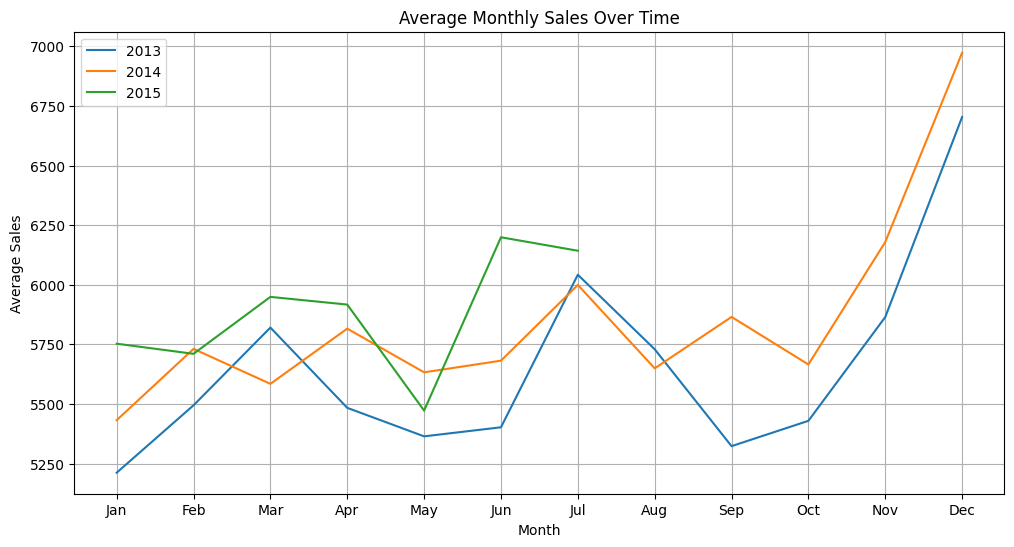

Year
2013    6703.618140
2014    6973.282456
Name: Sales, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract month and year for easier analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

# Group by month and year to calculate average sales for each month
monthly_sales = df1.groupby(['Month', 'Year'])['Sales'].mean().reset_index()

# Plot average sales for each month across different years
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales Over Time')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Further analysis (optional):
# 1. Calculate the average sales for specific months (e.g., December for Christmas)
# 2. Compare sales in those months across different years.
# 3. Consider using a boxplot to visualize the distribution of sales in specific months.
# Example for December:
december_sales = df1[df1['Month'] == 12]
print(december_sales.groupby('Year')['Sales'].mean())

Investigate seasonal purchasing patterns (e.g., Christmas, Easter).December average sales, rest of months other than december average sale

In [ ]:

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract month and year for easier analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

# Calculate December average sales
december_sales = df1[df1['Month'] == 12]['Sales'].mean()

# Calculate average sales for months other than December
other_months_sales = df1[df1['Month'] != 12]['Sales'].mean()

print(f"Average December Sales: {december_sales}")
print(f"Average Sales (excluding December): {other_months_sales}")


Average December Sales: 6826.611376868607
Average Sales (excluding December): 5703.662913053828


Average Monthly Sales During Holiday and Non Holiday Months

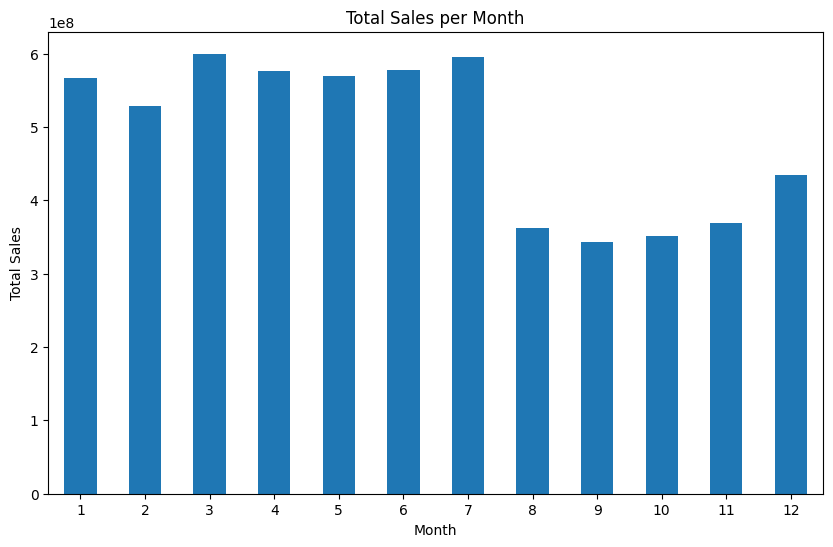

December Sales: 433831153
Average Sales in other months: 494486315.45454544
Average Sales in Christmas period: 7137.474364723468
Average Sales outside Christmas period: 5755.6428594910085


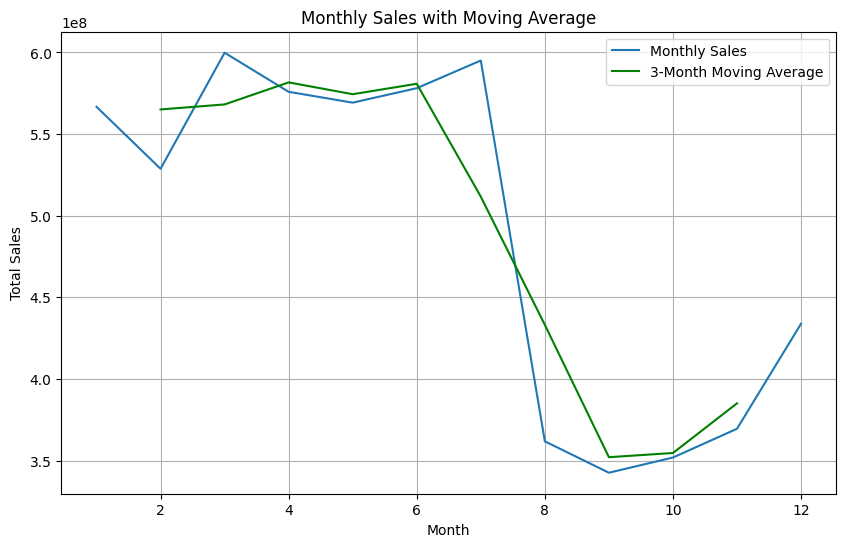

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df1 = pd.merge(store_data, train_data, on='Store', how='inner')
df1['Date']=pd.to_datetime(df1['Date'])



# Group data by month and calculate total sales
df1['Month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=0)
plt.show()

# Identify potential seasonal patterns (e.g., December for Christmas)
# Example: Analyze sales in December compared to other months
december_sales = monthly_sales[12]  # Assuming December is month 12
average_sales_other_months = monthly_sales[monthly_sales.index != 12].mean()

print(f"December Sales: {december_sales}")
print(f"Average Sales in other months: {average_sales_other_months}")

# Further analysis: Compare sales during holiday periods with other periods.

def is_holiday_period(date):
    # Define the holiday periods (example: Christmas)
    christmas_start = pd.to_datetime('2013-12-15')
    christmas_end = pd.to_datetime('2013-12-26')
    # Add more holiday periods as needed
    if christmas_start <= date <= christmas_end:
      return True
    return False

df1['IsChristmasPeriod'] = df1['Date'].apply(is_holiday_period)

# Calculate average sales for Christmas Period
christmas_sales = df1[df1['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales in Christmas period: {christmas_sales}")


# Analyze sales in the Christmas period compared to the non-Christmas period
non_christmas_sales = df1[~df1['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales outside Christmas period: {non_christmas_sales}")


# Calculate and plot monthly sales with a moving average to smooth out noise
window_size = 3  # Example window size for moving average
monthly_sales_ma = monthly_sales.rolling(window=window_size, center=True).mean()


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

Assess correlations between sales and customer numbers

Correlation between Sales and Customers: 0.894710773301702


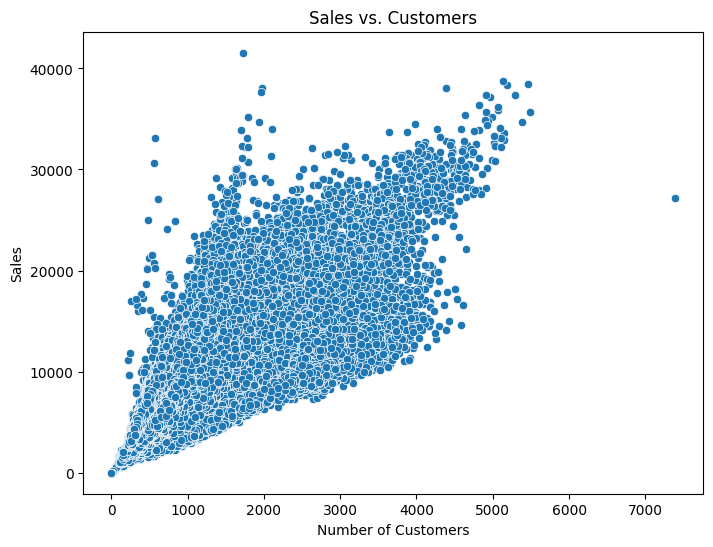

In [ ]:
# Calculate the correlation between 'Customers' and 'Sales'
correlation_sales_customers = df1['Customers'].corr(df1['Sales'])
print(f"Correlation between Sales and Customers: {correlation_sales_customers}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=df1)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

Evaluate the impact of promotions on customer behavior

In [ ]:
# Group data by 'Promo' and calculate average sales
promo_impact = df1.groupby('Promo')['Sales'].mean()

# Print the average sales for promo and non-promo days
print(promo_impact)

# Statistical tests to determine significance of promo impact

from scipy.stats import ttest_ind

# Separate sales data for promo and non-promo days
sales_with_promo = df1[df1['Promo'] == 1]['Sales']
sales_without_promo = df1[df1['Promo'] == 0]['Sales']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(sales_with_promo, sales_without_promo)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales between promotion and no promotion days.")
else:
    print("There is no statistically significant difference in sales between promotion and no promotion days.")



Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64
T-statistic: 511.5471867316377
P-value: 0.0
There is a statistically significant difference in sales between promotion and no promotion days.


Examine trends of sales based on store opening/closing times

         count         mean         std  min     25%     50%     75%      max
Open                                                                         
0     172817.0     0.000000     0.00000  0.0     0.0     0.0     0.0      0.0
1     844392.0  6955.514291  3104.21468  0.0  4859.0  6369.0  8360.0  41551.0


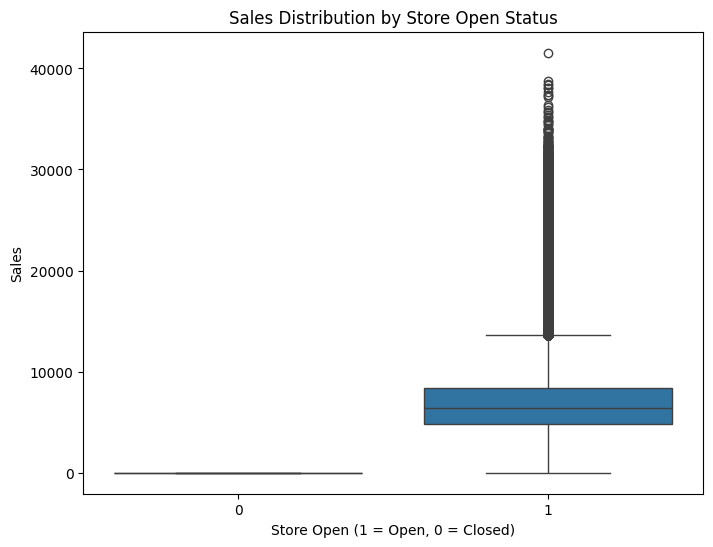

In [ ]:
# Convert 'Date' to datetime if it's not already
#Check if 'Date' is in columns, if not reset the index
if 'Date' not in df1.columns:
    df1 = df1.reset_index()  # Reset the index to bring back the 'Date' column

df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index('Date')

# Group data by 'Open' status and calculate descriptive statistics of sales
sales_by_open_status = df1.groupby('Open')['Sales'].describe()

print(sales_by_open_status)

# Visualize the distribution of sales for open and closed stores using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Open', y='Sales', data=df1)
plt.title('Sales Distribution by Store Open Status')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Sales')
plt.show()




<Figure size 1000x600 with 0 Axes>

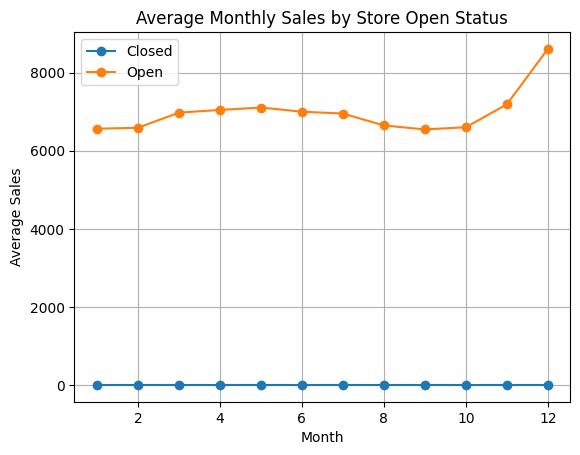

In [ ]:
# Group data by month and open status and calculate average sales
monthly_sales_by_open_status = df1.groupby([df1.index.month, 'Open'])['Sales'].mean().unstack()

# Plot monthly sales for open and closed stores
plt.figure(figsize=(10, 6))
monthly_sales_by_open_status.plot(kind='line', marker='o')  # line plot
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales by Store Open Status')
plt.legend(['Closed', 'Open'])
plt.grid(True)
plt.show()


Task-2-Sales Prediction

Handle Missing values and scale Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns using imputation (e.g., mean)
imputer = SimpleImputer(strategy='mean')
df1[numerical_cols] = imputer.fit_transform(df1[numerical_cols])

# Handle missing values in categorical columns using imputation
imputer_categorical = SimpleImputer(strategy='most_frequent')
df1[categorical_cols] = imputer_categorical.fit_transform(df1[categorical_cols])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

print(df1.head())


              Store StoreType Assortment  CompetitionDistance  \
Date                                                            
2015-07-31 -1.73164         c          a              -0.5399   
2015-07-30 -1.73164         c          a              -0.5399   
2015-07-29 -1.73164         c          a              -0.5399   
2015-07-28 -1.73164         c          a              -0.5399   
2015-07-27 -1.73164         c          a              -0.5399   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear    Promo2  \
Date                                                                        
2015-07-31                   0.669941                 -0.139458 -1.001128   
2015-07-30                   0.669941                 -0.139458 -1.001128   
2015-07-29                   0.669941                 -0.139458 -1.001128   
2015-07-28                   0.669941                 -0.139458 -1.001128   
2015-07-27                   0.669941                 -0.139458 -1.001128   

    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

# Convert 'Date' to datetime and set as index
df1['Date'] = pd.to_datetime(df1['Date'])



Generate additional features, e.g., weekdays, weekends, days to/from holidays.

In [ ]:
# Convert 'Date' to datetime if it's not already
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract features from the 'Date' column
df1['DayOfWeek'] = df1['Date'].dt.dayofweek  # Monday=0, Sunday=6
df1['IsWeekend'] = df1['DayOfWeek'] >= 5  # 1 if weekend, 0 otherwise

# Example holidays (replace with actual holiday dates)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])

# Calculate days to/from holidays
def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df1['DaysToHoliday'] = df1['Date'].apply(lambda x: days_to_holiday(x, holidays))


In [ ]:
df1['IsWeekend'].value_counts()

,count
IsWeekend,
False,727749
True,289460


Treat the Outliers and build a Random forest model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df1 = pd.merge(store_data, train_data, on='Store', how='inner')


df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df1[col].fillna('unknown', inplace=True)



for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(store_data, col):
    Q1 = store_data[col].quantile(0.25)
    Q3 = store_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
    return store_data

for col in features:
    df1 = treat_outliers_capping(df1,col)


# Split data into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 746.8543055008223


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9622452049533062



Based on Random Forest Model ,Train the Model Based on Train Data and Predict on the Test Data for Sales for first 10 IDS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

# Convert object data type features to string
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'

# Treat outliers by capping
def treat_outliers_capping(store_data, col):
    Q1 = store_data[col].quantile(0.25)
    Q3 = store_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
    return store_data

for col in features:
    df1 = treat_outliers_capping(df1,col)


In [ ]:
# Split data into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales for the first 10 IDs in the test set
test_data = X_test.head(10)
sales_predictions = model.predict(test_data)

sales_predictions

array([ 9830.15282479,  2052.09333333,  5493.70569048,  4125.71209524,
        5711.05966667,     0.        , 14328.60219124,  9523.68333333,
           0.        ,     0.        ])

Save the above model using pickle file

In [ ]:

import pickle

# Save the trained Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Sales Prediction for next 6weeks Period based on Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your data
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Merge the datasets
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

In [ ]:
# Preprocessing
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
    df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])


In [ ]:
# Feature Engineering (Important:  Adapt to your actual data and needs)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['DayOfWeek'] = df1['Date'].dt.dayofweek
df1['IsWeekend'] = (df1['DayOfWeek'] >= 5).astype(int)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])

def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df1['DaysToHoliday'] = df1['Date'].apply(lambda x: days_to_holiday(x, holidays))

# Feature Selection
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
            'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
target = 'Sales'

# Outlier Treatment
def treat_outliers_capping(store_data, col):
    Q1 = store_data[col].quantile(0.25)
    Q3 = store_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
    return store_data

for col in features:
    df1 = treat_outliers_capping(df1, col)

# Model Training
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

last_date = df1['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42) #Six weeks = 42 days
test_data = pd.DataFrame({'Date': future_dates})
test_data['DayOfWeek'] = test_data['Date'].dt.dayofweek
test_data['IsWeekend'] = (test_data['DayOfWeek'] >=5).astype(int)
test_data['DaysToHoliday'] = test_data['Date'].apply(lambda x: days_to_holiday(x, holidays))
# Fill other features with some placeholder value (replace with actual data)
for col in features:
  if col not in test_data.columns:
      test_data[col] = df1[col].mean()

#Ensure correct order of features and dtype
test_data = test_data[features]
for col in features:
  test_data[col] = test_data[col].astype(df1[col].dtype)

sales_predictions = model.predict(test_data)

# Save predictions to CSV
predictions_store_data = pd.DataFrame({'Date': future_dates, 'SalesPrediction': sales_predictions})
predictions_store_data.to_csv('sales_predictions.csv', index=False)

Logger implementation for tracking steps

In [ ]:
import logging

class Logger:
    def __init__(self, log_file="app.log"):
        self.logger = logging.getLogger(__name__)
        self.logger.setLevel(logging.INFO)

        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        self.logger.addHandler(file_handler)

        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        self.logger.addHandler(console_handler)

    def log_step(self, message):
        self.logger.info(message)

# Example usage (adapt to your code)
logger = Logger()
logger.log_step("Starting data loading process")
# ... your data loading code ...
logger.log_step("Data loaded successfully")

logger.log_step("Starting feature engineering")
# ... your feature engineering code ...
logger.log_step("Feature engineering complete")



2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
2024-12-30 16:40:50,375 - INFO - Starting data loading process
INFO:__main__:Starting data loading process
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
2024-12-30 16:40:50,389 - INFO - Data loaded successfully
INFO:__main__:Data loaded successfully
2024-12-30 16:40:50,398 - INFO - Starting feature engineering
2024-12-

Utilize modular pipelines for efficient workflows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


class DataPipeline:
    def __init__(self, store_file, train_file, log_file="app.log"):
        self.store_file = store_file
        self.train_file = train_file
        self.logger = self._setup_logger(log_file)
        self.df1 = None

    def _setup_logger(self, log_file):
        logger = logging.getLogger(__name__)
        logger.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)
        return logger

    def load_data(self):
        self.logger.info("Starting data loading process")
        try:
            store_data = pd.read_csv(self.store_file)
            train_data = pd.read_csv(self.train_file)
            self.train_data = pd.merge(store_data, train_data, on='Store', how='inner') #Fixed: Changed trained_data to train_data
            self.logger.info("Data loaded successfully")
        except FileNotFoundError:
            self.logger.error("One or both data files not found.")
            raise

    def preprocess_data(self):
        self.logger.info("Starting data preprocessing")
        # Handle missing values and convert data types
        self.train_data['CompetitionDistance'].fillna(self.train_data['CompetitionDistance'].median(), inplace=True) #Fixed: Changed self.df1 to self.train_data
        for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
            self.train_data[col].fillna('unknown', inplace=True)

        for col in self.train_data.columns:
            if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
                if self.train_data[col].dtype == 'object':
                    self.train_data[col].fillna(self.train_data[col].mode()[0], inplace=True)
                elif self.train_data[col].dtype in ['int64', 'float64']:
                    self.train_data[col].fillna(self.train_data[col].median(), inplace=True)

        for col in self.train_data.columns:
            if self.train_data[col].dtype == 'object':
                self.train_data[col] = self.train_data[col].astype(str)

        le = LabelEncoder()
        for col in self.train_data.columns: #Fixed: Changed self.train_datas to self.train_data
            if self.train_data[col].dtype == 'object':
                self.train_data[col] = le.fit_transform(self.train_data[col])
        self.logger.info("Data preprocessing complete")
        self.df1 = self.train_data  # Assign the preprocessed data to df1

    def feature_engineer(self):
        self.logger.info("Starting feature engineering")
        self.df1['Date'] = pd.to_datetime(self.df1['Date'])
        self.df1['DayOfWeek'] = self.df1['Date'].dt.dayofweek  # Use 'Date' instead of 'date'
        self.df1['IsWeekend'] = (self.df1['DayOfWeek'] >= 5).astype(int)

        holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])  # Define holidays as a list

        def days_to_holiday(date, holidays):
            min_days = np.inf
            for holiday in holidays:
                days = abs((date - holiday).days)
                min_days = min(min_days, days)
            return min_days

        self.df1['DaysToHoliday'] = self.df1['Date'].apply(lambda x: days_to_holiday(x, holidays))
        self.logger.info("Feature engineering complete")

    def train_model(self):
        self.logger.info("Starting model training")
        features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
                    'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
        target = 'Sales'

        def treat_outliers_capping(store_data, col):
            Q1 = store_data[col].quantile(0.25)
            Q3 = store_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
            return store_data

        for col in features:
            self.df1 = treat_outliers_capping(self.df1, col)

        X = self.df1[features]
        y = self.df1[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        self.logger.info("Model training complete")
        return model, X_test, y_test

    def predict_sales(self, model, X_test):
        self.logger.info("Starting sales prediction")
        sales_predictions = model.predict(X_test)
        self.logger.info("Sales prediction complete")
        return sales_predictions

# Example Usage
if __name__ == "__main__":
    pipeline = DataPipeline("/content/drive/MyDrive/store.csv", "/content/drive/MyDrive/train.csv")
    pipeline.load_data()
    pipeline.preprocess_data()
    pipeline.feature_engineer()
    model, X_test, y_test = pipeline.train_model()
    sales_predictions = pipeline.predict_sales(model, X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, sales_predictions))
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, sales_predictions)
    print(f"R-squared: {r2}")

2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
2024-12-30 16:41:08,353 - INFO - Starting data loading process
INFO:__main__:Starting data loading process
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded successfully
2024-12-30 16:41:10,278 - INFO - Data loaded s

RMSE: 746.8881030965367
R-squared: 0.9622417878205083


Random Forest Model as Per Test Data Input

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv') # Load test_data

#Merge train and store data
train_data = pd.merge(store_data, train_data, on='Store', how='inner') # Merge store and train data to get 'Sales' column

#df1['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['Date']:
  train_data[col].fillna('unknown', inplace=True)



for col in train_data.columns:
    if col not in ['Date']:
        if train_data[col].dtype == 'object':
            train_data[col].fillna(train_data[col].mode()[0], inplace=True)
        elif train_data[col].dtype in ['int64', 'float64']:
            train_data[col].fillna(train_data[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = le.fit_transform(train_data[col])


# Assuming 'Id' is in test_data, but not in train_data
test_data['Id'] = test_data.index

# Select features and target variable
# Removed 'Date' and 'Id' from features as they are likely not useful for prediction
# and 'Id' was causing issues because it was only present in test_data
# Added features that are likely to be relevant for prediction based on the previous code
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
target = 'Sales'


# Treat outliers by capping
def treat_outliers_capping(store_data, col):
    # Check if the column is numeric before applying outlier treatment
    if pd.api.types.is_numeric_dtype(store_data[col]):
        Q1 = store_data[col].quantile(0.25)
        Q3 = store_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
    return store_data

# Apply outlier treatment to train_data, not test_data
for col in features:
    train_data = treat_outliers_capping(train_data, col)

# Split data into training and testing sets
X = train_data[features]  # Use train_data for features and target
y = train_data[target]    # Use train_data for features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Build and train a Random Forest model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1651.896375434635


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8153323968358511


In [ ]:
import pickle

# Assuming 'model1' is the trained RandomForestRegressor from your code
# Save the model to a file
filename = 'model1.pkl'
pickle.dump(model1, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to model1.pkl


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
store_data = pd.read_csv('/content/drive/MyDrive/store.csv')
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
df1 = pd.merge(store_data, train_data, on='Store', how='inner')

# Preprocessing (assuming you have the preprocessing code from the original script)
df1['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
    df1[col].fillna('unknown', inplace=True)

for col in df1.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode()[0], inplace=True)
        elif df1[col].dtype in ['int64', 'float64']:
            df1[col].fillna(df1[col].median(), inplace=True)

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype(str)

le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])


# Feature Engineering (Example features)
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment', 'StoreType', 'CompetitionDistance', 'Promo2SinceWeek']
target = 'Sales'

# Outlier treatment
def treat_outliers_capping(store_data, col):
    Q1 = store_data[col].quantile(0.25)
    Q3 = store_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    store_data[col] = np.clip(store_data[col], lower_bound, upper_bound)
    return store_data

for col in features:
    df1 = treat_outliers_capping(df1, col)

X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save models and variables
filename = 'rossmanpharmasalesnew.pkl'
with open(filename, 'wb') as file:
  pickle.dump({'random_forest_model': model, 'features': features, 'target': target}, file)

print(f"Models and variables saved to {filename}")

Models and variables saved to rossmanpharmasalesnew.pkl
